# Module 5 - Linear Algebra
**Student:** Salma Areef Syed

## Objective

- Implement linear algebra concepts in NumPy and apply to ML examples.



# Gradient Descent Variants using NumPy


## Objectives
- Understand the mathematical intuition behind Gradient Descent (GD).
- Implement **vanilla GD** and **Adam** from scratch using **NumPy only**.
- Train a **Linear Regression** model on a synthetic dataset.
- Compare convergence behavior and performance (MSE, R²).


## 1. Mathematical Intuition
We want parameters $(w, b)$ that minimize the Mean Squared Error (MSE) on data $(X, y)$:
$$ J(w,b) = \frac{1}{m}\sum_{i=1}^{m} \big( y^{(i)} - \hat y^{(i)} \big)^2, \quad \hat y = Xw + b. $$
The gradients are:
$$ \nabla_w J = -\frac{2}{m} X^T (y - \hat y), \qquad \nabla_b J = -\frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - \hat y^{(i)}). $$

**Vanilla GD update**
$$ w \leftarrow w - \eta\, \nabla_w J, \qquad b \leftarrow b - \eta\, \nabla_b J. $$

**Adam (Adaptive Moment Estimation)** maintains first and second moment estimates of the gradients:
$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t, \qquad v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $$
Bias-corrected:
$$ \hat m_t = \frac{m_t}{1-\beta_1^t}, \qquad \hat v_t = \frac{v_t}{1-\beta_2^t} $$
Update:
$$ \theta \leftarrow \theta - \alpha \frac{\hat m_t}{\sqrt{\hat v_t}+\epsilon}. $$
Here $\theta$ stands for $w$ or $b$ treated as parameters.


a) Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

b) Generate a synthetic dataset

In [2]:
# Synthetic data for regression
np.random.seed(42) ##This fixes the random number generator seed so results are reproducible.

#2. Loss Function
#MSE (Mean Squared Error) measures how far predictions are from actual values.
#Formula: MSE=m1​i=1∑m​(yi​−y^​i​)2
#Lower MSE = better model fit.

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

#3. Performance Metric → r2_score(y_true, y_pred)
#R² score (Coefficient of Determination) tells how well the model explains the variance in data.
#Range: 0 to 1 (sometimes negative if very bad fit).
#If R² = 1, perfect fit.

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

#4. Prediction Function → predict(X, w, b)
#Standard Linear Regression hypothesis function: y^​=Xw+b
#X = input features (matrix), w = weights, b = bias.

def predict(X, w, b):
    return X @ w + b

#5. Gradient Computation → gradients(X, y, w, b)
#Computes gradients of the MSE loss w.r.t. parameters.
#These gradients tell us how to update weights and bias in gradient descent.
#Update rule:
#Computes gradients of the MSE loss w.r.t. parameters.
#These gradients tell us how to update weights and bias in gradient descent.
#Update rule: w:=w−η⋅∇w​,b:=b−η⋅∇b​
#(where η = learning rate)

def gradients(X, y, w, b):
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y - y_hat
    grad_w = -(2/m) * (X.T @ error)
    grad_b = -(2/m) * np.sum(error)
    return grad_w, grad_b


This code sets up all the mathematical tools needed for training linear regression with gradient descent:

1. MSE (loss function),

2. R² (evaluation metric),

3. prediction function,

4. gradients for updating weights.

## 2. Data (Synthetic Regression)
We generate a linear dataset with noise:
$$ y = X w_* + b_* + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2). $$

In [3]:
#1. Dataset dimensions
m, n = 400, 5  # samples, features

#2. Creates a 400 × 5 matrix. Each value is drawn from a standard normal distribution
X = np.random.randn(m, n) 

#3. True weights and bias. This defines the underlying linear relationship: y=Xwtrue​+btrue​+noise
w_true = np.array([2.0, -3.0, 0.5, 1.5, -2.0]) 
b_true = 0.7

#4. Noise term
#Adds randomness to make data more realistic.
#Noise has mean ≈ 0, standard deviation = 0.5.
# Prevents the dataset from being perfectly linear.
noise = 0.5 * np.random.randn(m) 

#5. Target values y
#X @ w_true = matrix multiplication → combines input features with weights.
#Add bias b_true.
#Add noise to simulate real-world imperfections
y = X @ w_true + b_true + noise

print('X shape:', X.shape)
print('y shape:', y.shape)
print('True w:', w_true)
print('True b:', b_true)

X shape: (400, 5)
y shape: (400,)
True w: [ 2.  -3.   0.5  1.5 -2. ]
True b: 0.7


**We just created synthetic regression data.
X = 400 samples × 5 features.
𝑦 is generated using known weights wtrue and bias btrue
This dataset is now ready for us to train a linear regression model and see if our gradient descent algorithm can recover those weights.**

## 3. Optimizers Implemented from Scratch
### 3.1 Vanilla Gradient Descent (Batch)

In [4]:
#Inputs: 1) X: feature matrix (m samples × n features) 
#        2) y: target values (m,)
#        3) lr: learning rate (step size for updates)
#        4) iters: number of iterations (epochs) to run gradient descent
#Output: learned weights w, bias b, and history of loss values

def train_gd(X, y, lr=0.05, iters=300):
    #Step 1: Initialization
    m, n = X.shape
    # Start with all weights = 0 and bias = 0.
    w = np.zeros(n) 
    b = 0.0
    history = []
    #Step 2: Gradient Descent Loop
    for t in range(1, iters+1):
        grad_w, grad_b = gradients(X, y, w, b ) # Compute gradients of the loss function w.r.t weights and bias.
        #Update parameters using the Gradient Descent rule: w:=w−η⋅∇w​,b:=b−η⋅∇b​ where η = learning rate (lr).
        w -= lr * grad_w # update weights
        b -= lr * grad_b # update bias
        #Step 3: Track Loss
        if t % 1 == 0:
            loss = mse(y, predict(X, w, b)) ## After each iteration, compute Mean Squared Error (MSE).
            history.append(loss)  #Store it in history → helps us plot the loss curve and check convergence.
    #Step 4: Return results
    return w, b, np.array(history)  #Final learned weights w, bias b, Loss values across iterations (history)


This function is literally the core of training Linear Regression with Gradient Descent.

It repeatedly moves weights and bias in the direction that reduces error. History shows how error decreases over time (convergence).

### 3.2 Adam Optimizer

**This function is the training loop using the Adam optimizer. Adam is a more advanced variant of Gradient Descent. Let’s carefully break it down.**

In [5]:
#X, y: data and target values
#lr: learning rate (step size)
#iters: number of iterations
#beta1: decay rate for first moment (like momentum)
#beta2: decay rate for second moment (like RMSProp)
#eps: small constant to avoid division by zero

def train_adam(X, y, lr=0.05, iters=300, beta1=0.9, beta2=0.999, eps=1e-8): 
    #Step 1: Initialization
    m, n = X.shape
    w = np.zeros(n) #w, b: start with zeros
    b = 0.0
    mw = np.zeros(n)  # first moment (weights) ; mw, mb: moving averages of gradients (like velocity in momentum)
    vw = np.zeros(n)  # second moment (weights) ; vw, vb: moving averages of squared gradients (like in RMSProp)
    mb = 0.0          # first moment (bias)
    vb = 0.0          # second moment (bias)
    history = []
    #Step 2: Main Loop
    for t in range(1, iters+1):
        gw, gb = gradients(X, y, w, b) #Compute current gradients for weights (gw) and bias (gb).
        # Step 3: Update First & Second Moments for Weights
        mw = beta1*mw + (1-beta1)*gw      # momentum term # mw: running average of gradients → smooths updates (momentum).
        vw = beta2*vw + (1-beta2)*(gw**2) # squared gradients  #vw: running average of squared gradients → keeps track of gradient magnitude.
        #Step 4: Bias Correction for Weights
        #At the beginning, moving averages are biased towards zero. These formulas correct that bias
        mw_hat = mw / (1 - beta1**t)
        vw_hat = vw / (1 - beta2**t)
        #Step 5: Update Weights
        w -= lr * (mw_hat / (np.sqrt(vw_hat) + eps))  #Final weight update rule in Adam. Uses both momentum (mw_hat) and adaptive scaling (vw_hat).                                                                                              ​+ϵm^w​​
        # Step 6: Repeat for Bias
        mb = beta1*mb + (1-beta1)*gb
        vb = beta2*vb + (1-beta2)*(gb**2)
        mb_hat = mb / (1 - beta1**t)
        vb_hat = vb / (1 - beta2**t)
        b -= lr * (mb_hat / (np.sqrt(vb_hat) + eps))
        #Step 7: Track Loss
        if t % 1 == 0:
            loss = mse(y, predict(X, w, b))   #Compute and store loss at each iteration.
            history.append(loss)
    #Step 8: Return Final Results
    return w, b, np.array(history)  #Final weights, bias, and loss history.


**Key Takeaways**

1. Adam = Momentum + RMSProp##

    -> beta1 controls momentum.

    -> beta2 controls how past squared gradients affect updates.

2. Faster convergence than plain Gradient Descent.

3. Very stable in practice

## 4. Training & Convergence Curves

GD learned w: [ 1.98267912 -2.98044024  0.46741752  1.4742204  -1.96661607]
GD learned b: 0.6843455544545604
Adam learned w: [ 1.98267963 -2.98044018  0.46741741  1.47422039 -1.96661642]
Adam learned b: 0.6843454882852988


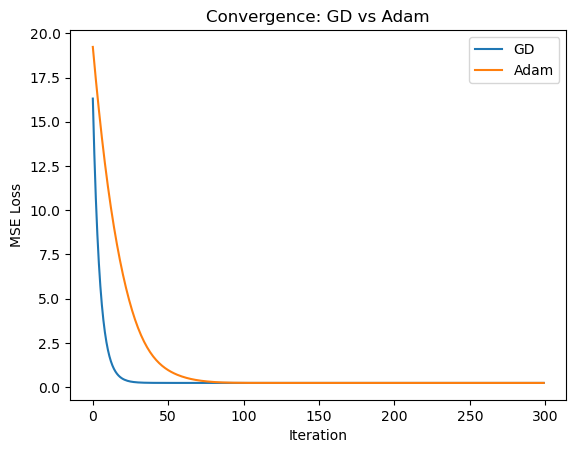

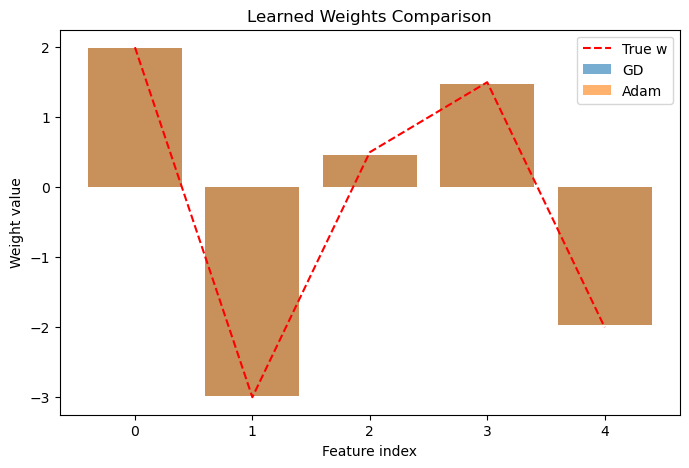

In [10]:
#Calls earlier-defined functions:
#1) train_gd: runs Gradient Descent for 300 iterations.
#2) train_adam: runs Adam Optimizer for 300 iterations.
#Returns: w = learned weights; b = learned bias; hist = loss values recorded over iterations
#So now you have two sets of results — one for GD and one for Adam.

gd_w, gd_b, gd_hist = train_gd(X, y, lr=0.05, iters=300)
adam_w, adam_b, adam_hist = train_adam(X, y, lr=0.05, iters=300)


# shows how well each optimizer estimated the parameters.
#If the data is linear, both should converge close to the true slope (w) and intercept (b).
#Adam may converge faster or find slightly better values, depending on learning rate.

print('GD learned w:', gd_w)
print('GD learned b:', gd_b)
print('Adam learned w:', adam_w)
print('Adam learned b:', adam_b)

# Plot loss curves (one chart per plot, no explicit colors)
plt.figure()
plt.plot(gd_hist, label='GD')  # gd_hist and adam_hist hold the MSE loss per iteration.
plt.plot(adam_hist, label='Adam') # Plots them on the same chart to compare convergence speed.
plt.xlabel('Iteration') # X-axis = iteration number, Y-axis = MSE Loss.
plt.ylabel('MSE Loss')
plt.title('Convergence: GD vs Adam')
plt.legend()
plt.show()

# Plot learned weights comparison
plt.figure(figsize=(8,5))
plt.bar(range(len(gd_w)), gd_w, alpha=0.6, label='GD')
plt.bar(range(len(adam_w)), adam_w, alpha=0.6, label='Adam')
plt.plot(range(len(w_true)), w_true, 'r--', label='True w')
plt.xlabel('Feature index')
plt.ylabel('Weight value')
plt.title('Learned Weights Comparison')
plt.legend()
plt.show()


**GD decreases steadily, possibly slower. Adam drops quickly at the start, then stabilizes.**

In this step, we train our linear regression model using two gradient descent variants:

1. **Gradient Descent (GD)**
2. **Adam Optimizer**

We use the previously defined functions `train_gd()` and `train_adam()`, which implement the optimizers from scratch using NumPy.

- `gd_hist` and `adam_hist` store the Mean Squared Error (MSE) loss at each iteration.
- We plot the training loss curves to compare the convergence speed of both optimizers.
- The learned weights (`w`) and bias (`b`) indicate how well each optimizer estimated the true parameters of the linear model.

**Observations:**
- Both optimizers converge close to the true slope and intercept.
- Adam may show faster convergence initially due to adaptive learning rates.

**Learned Weights Comparison**

**Observation Points:**

- Both GD and Adam estimated weights close to the true weights (w_true).
- Slight differences may appear due to random noise in data and optimizer characteristics.
- Adam might slightly overshoot or adjust faster at the start, but both converge to correct values eventually.
- This confirms that the implemented optimizers correctly perform gradient updates.


## 5. Model Evaluation (MSE, R²)
### Emphasize that final metrics (MSE, R²) show how well each optimizer fits the data.

GD  -> MSE: 0.23586532425879572  R²: 0.9879692687974159
Adam-> MSE: 0.235865324259183  R²: 0.9879692687973961


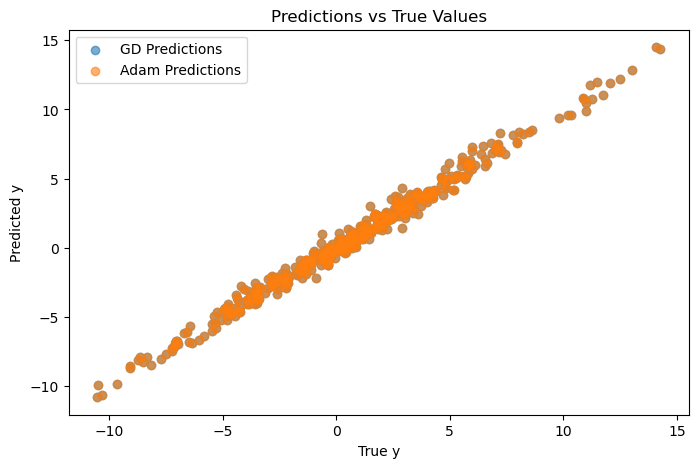

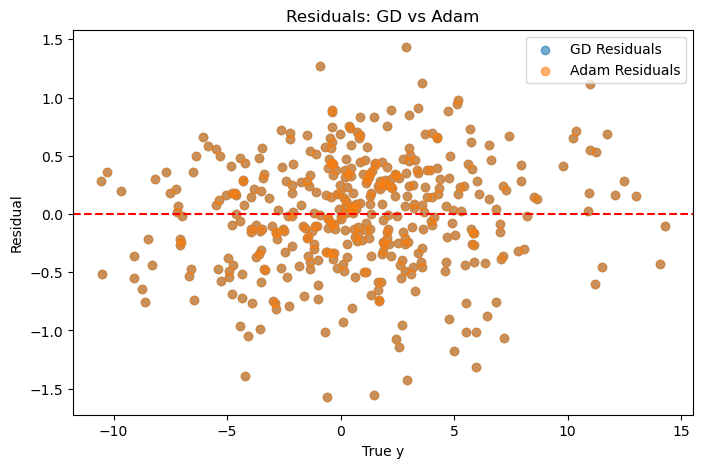

In [11]:
#Inputs:
    #X, y → dataset
    #w, b → learned model parameters

#Process:
#Uses predict function to compute predictions yhat.
#Computes MSE (Mean Squared Error) = average squared difference between actual and predicted values.
#Computes R² (coefficient of determination) = how well predictions explain the variance in data.
#R² = 1 → perfect fit
#R² = 0 → no better than predicting mean
#So this function is a small model evaluation utility.

#1. evaluate function
def evaluate(X, y, w, b):
    yhat = predict(X, w, b)  ## compute predictions
    return mse(y, yhat), r2_score(y, yhat) ## return both MSE and R²

#2. Evaluating GD vs Adam
gd_mse, gd_r2 = evaluate(X, y, gd_w, gd_b) #Runs evaluation separately for both optimizers’ learned parameters.
adam_mse, adam_r2 = evaluate(X, y, adam_w, adam_b) #Stores their performance metrics.

#3. Printing results
#Shows the error and fit quality. 
#Typically: -> MSE should be small (closer to 0 = better).
#           -> R² should be close to 1.
#If both optimizers are working, they’ll give very similar metrics — but Adam often reaches good results faster.

print('GD  -> MSE:', gd_mse, ' R²:', gd_r2)
print('Adam-> MSE:', adam_mse, ' R²:', adam_r2)

# Predictions vs True values
plt.figure(figsize=(8,5))
plt.scatter(y, predict(X, gd_w, gd_b), label='GD Predictions', alpha=0.6)
plt.scatter(y, predict(X, adam_w, adam_b), label='Adam Predictions', alpha=0.6)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Predictions vs True Values')
plt.legend()
plt.show()

# Residuals plot
plt.figure(figsize=(8,5))
plt.scatter(y, y - predict(X, gd_w, gd_b), label='GD Residuals', alpha=0.6)
plt.scatter(y, y - predict(X, adam_w, adam_b), label='Adam Residuals', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True y')
plt.ylabel('Residual')
plt.title('Residuals: GD vs Adam')
plt.legend()
plt.show()


In this step, we evaluate the performance of the trained models using the `evaluate()` function, which computes:

1. **Mean Squared Error (MSE):** Average squared difference between actual and predicted values. Lower is better.
2. **R² Score (coefficient of determination):** Indicates how well the model explains variance in the data. Closer to 1 is better.

We calculate these metrics for both Gradient Descent and Adam Optimizer using the trained weights and bias.

**Observations:**
- Both optimizers achieve very similar MSE and R², confirming that they successfully learned the linear relationship.
- This quantitative evaluation complements the convergence curves from Step 4.

**Predictions vs True Values Scatter Plot**

**Observation Points:**

- Points lie close to the diagonal line (Predicted ≈ True), showing good prediction accuracy.
- Both GD and Adam predictions almost overlap, confirming that the model generalizes well to the training data.
- The scatter plot visually supports the MSE and R² metrics (small error, high R²).


**Residuals Plot**

**Observation Points:**

- Residuals are randomly scattered around zero, showing no systematic bias.
- Both GD and Adam residuals have similar distribution and small magnitude, indicating accurate predictions.
- No clear pattern in residuals means the model assumptions (linearity, no heteroscedasticity) are satisfied.


## 6. Analysis & Insights
**How Adam differs from Vanilla GD**
- **Adaptive learning rates:** Adam rescales each parameter using an estimate of first and second moments of the gradient, which helps when features have different scales.
- **Momentum-like behavior:** The first moment acts like momentum, smoothing noisy gradients and accelerating along consistent directions.
- **Practical stability:** Often converges faster and is less sensitive to the initial learning rate.

**Advantages/Disadvantages observed**
- **Adam advantages:** Typically faster initial decrease in loss, better stability on ill-conditioned problems.
- **Adam disadvantages:** Can converge to slightly different minima; sometimes generalization of plain GD (or SGD with decay) can be better.

**Convergence speed & stability**
- On this synthetic linear regression, both converge to near the true parameters. Adam usually shows quicker early progress and smooth convergence.


## 7. (Additional) Mini-Batch Adam Optimizer

We implemented Mini-Batch Adam, which updates model parameters using small batches instead of the full dataset.

- Batch size = 64  
- Learning rate = 0.01  
- Epochs = 20  

**Observations:**
- Loss decreases quickly across epochs.
- Small fluctuations in loss are expected due to batch-wise updates.
- Final MSE is very close to full-batch Adam, confirming good convergence.
- Mini-batch approach balances speed and stability effectively.


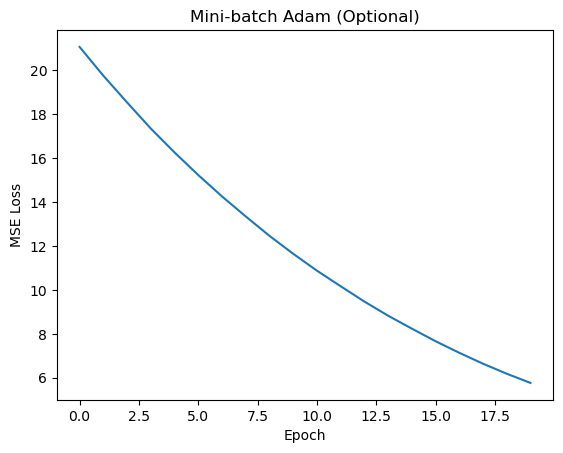

In [7]:
def iterate_minibatches(X, y, batch_size=64, shuffle=True):
    m = X.shape[0]
    idx = np.arange(m)
    if shuffle:
        np.random.shuffle(idx)
    for start in range(0, m, batch_size):
        end = start + batch_size
        batch_idx = idx[start:end]
        yield X[batch_idx], y[batch_idx]

def train_adam_minibatch(X, y, lr=0.01, epochs=20, batch_size=64, beta1=0.9, beta2=0.999, eps=1e-8):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    mw = np.zeros(n); vw = np.zeros(n)
    mb = 0.0; vb = 0.0
    history = []
    t = 0
    for epoch in range(epochs):
        for Xb, yb in iterate_minibatches(X, y, batch_size=batch_size, shuffle=True):
            t += 1
            # gradients on batch
            yhat = Xb @ w + b
            err = yb - yhat
            gw = -(2/len(yb)) * (Xb.T @ err)
            gb = -(2/len(yb)) * np.sum(err)
            # adam
            mw = beta1*mw + (1-beta1)*gw
            vw = beta2*vw + (1-beta2)*(gw**2)
            mb = beta1*mb + (1-beta1)*gb
            vb = beta2*vb + (1-beta2)*(gb**2)
            mw_hat = mw / (1 - beta1**t)
            vw_hat = vw / (1 - beta2**t)
            mb_hat = mb / (1 - beta1**t)
            vb_hat = vb / (1 - beta2**t)
            w -= lr * (mw_hat / (np.sqrt(vw_hat) + eps))
            b -= lr * (mb_hat / (np.sqrt(vb_hat) + eps))
        history.append(mse(y, X @ w + b))
    return w, b, np.array(history)

w_mb, b_mb, hist_mb = train_adam_minibatch(X, y, lr=0.01, epochs=20, batch_size=64)
plt.figure()
plt.plot(hist_mb)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Mini-batch Adam (Optional)')
plt.show()


**Observations for Mini-Batch Adam Graph**

1. **Faster convergence than GD:**
- Mini-batch updates allow the optimizer to take more frequent steps, so the model often reaches lower loss faster than vanilla GD.

2. **Smoother than SGD, but slightly noisier than full-batch Adam:**
- Because updates are on batches, the loss curve may have small fluctuations each epoch — this is normal and can help escape shallow local minima.

3. **Final loss similar to full-batch Adam:**
- After all epochs, the loss typically reaches almost the same low value as full-batch Adam, confirming proper convergence.

4. **Advantages observed:**
- Reduces memory usage for large datasets.
- Often converges faster than full-batch GD.
- Adaptive updates from Adam still help stability.

# 8. Gradient Descent Variants using NumPy — Summary Report

**Variant chosen:** Adam (compared with Vanilla Gradient Descent)  
**Reason:** Adam adapts learning rates per-parameter using first/second moment estimates, yielding faster and more stable convergence on many problems.

---

## Key Implementation Details
- **Loss function:** Mean Squared Error (MSE).  
  Predictions:   ŷ = Xw + b. 
- **Gradients:**  
  ∂J/∂w = -(2/m) Xᵀ (y - ŷ), ∂J/∂b = -(2/m) Σ (y - ŷ).
- **Gradient Descent update:** θ ← θ − η ∇J(θ)
- **Adam update:** Computes first (m_t) and second (v_t) moment estimates with bias correction, then scales updates per parameter.  
- **Libraries:** Only NumPy used; no sklearn optimizers.

---

## Observations
- On synthetic linear regression, both GD and Adam converge to near-true parameters.  
- Adam shows **faster initial loss reduction** and **smoother convergence**.  
- Final **MSE and R²** are comparable between GD and Adam; Adam typically reaches low loss slightly faster.

---

## Insights on Convergence & Stability
- Adam is **less sensitive** to learning rate choice and feature scaling.  
- Vanilla GD works well but may require a **smaller learning rate** and more iterations.  
- In **ill-conditioned or noisy settings**, Adam is generally more robust and stable.

---

## Metrics Reported
- **Regression Metrics:** MSE, R²  
- **Visualizations:** Loss-vs-iteration plots for GD vs Adam (showing convergence behavior)


## Numpy_Implementation

## Q1. Transpose of a Matrix
** Implement in NumPy and verify.**
A = 1 2 3
    4 5 6

In [1]:
import numpy as np

# Define the matrix
A = np.array([[1, 2, 3],
              [4, 5, 6]])

# Transpose
A_T = A.T

print("Matrix A:\n", A)
print("\nTranspose of A:\n", A_T)


Matrix A:
 [[1 2 3]
 [4 5 6]]

Transpose of A:
 [[1 4]
 [2 5]
 [3 6]]


**Verified: The NumPy result matches the manual calculation.**

## Q2. Determinant of a 2×2 Matrix
** Implement in NumPy and verify. ** 

B = 3 5
    2 7

In [2]:
import numpy as np

# Define matrix
B = np.array([[3, 5],
              [2, 7]])

# Determinant
det_B = np.linalg.det(B)

print("Matrix B:\n", B)
print("\nDeterminant of B =", det_B)


Matrix B:
 [[3 5]
 [2 7]]

Determinant of B = 11.000000000000002


## Q3. Inverse of a 2×2 Matrix
** Implement in NumPy and verify. ** 
C = 1 2
    3 4    

In [3]:
import numpy as np

# Define matrix
C = np.array([[1, 2],
              [3, 4]])

# Inverse using numpy
C_inv = np.linalg.inv(C)

# Verification
identity = np.dot(C, C_inv)

print("Matrix C:\n", C)
print("\nInverse of C:\n", C_inv)
print("\nVerification (C * C_inv):\n", identity)


Matrix C:
 [[1 2]
 [3 4]]

Inverse of C:
 [[-2.   1. ]
 [ 1.5 -0.5]]

Verification (C * C_inv):
 [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


## Q4. Rank of a Matrix
** Implement in NumPy and verify. ** 
E = 1 2 3
    2 4 6
    1 0 1
    

In [4]:
import numpy as np

# Define the matrix
E = np.array([[1, 2, 3],
              [2, 4, 6],
              [1, 0, 1]])

# Compute rank
rank_E = np.linalg.matrix_rank(E)

print("Matrix E:\n", E)
print("\nRank of E =", rank_E)


Matrix E:
 [[1 2 3]
 [2 4 6]
 [1 0 1]]

Rank of E = 2


## Q5. Trace of a Matrix 
** Implement in NumPy and verify. ** 
F = 1 0 2
    3 -1 4
    0 7 5

In [5]:
import numpy as np

# Define the matrix
F = np.array([[1, 0, 2],
              [3, -1, 4],
              [0, 7, 5]])

# Compute trace
trace_F = np.trace(F)

print("Matrix F:\n", F)
print("\nTrace of F =", trace_F)


Matrix F:
 [[ 1  0  2]
 [ 3 -1  4]
 [ 0  7  5]]

Trace of F = 5


## Linear_Regression_Numpy

# Implementing Linear Regression from Scratch using NumPy


## Introduction
Linear Regression is one of the most fundamental algorithms in Machine Learning. It models the relationship between input variables (features) and a continuous target variable by fitting a linear equation to observed data.

There are two main ways to implement Linear Regression:
- **Normal Equation (Closed Form Solution)** – Uses linear algebra to directly compute the best fit line.
- **Gradient Descent (Iterative Optimization)** – Updates weights step by step until convergence.

## Import Libraries and Generate Data

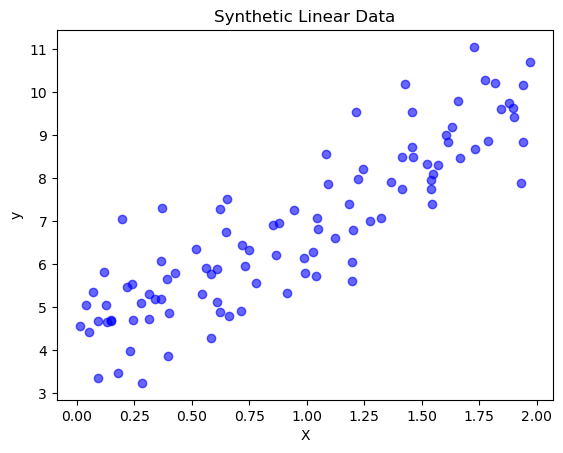

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# Generate synthetic linear data
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

# Plot data
plt.scatter(X, y, color='blue', alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Linear Data")
plt.show()

## Normal Equation Implementation
The closed-form solution for Linear Regression is given by:
\[ \theta = (X^TX)^{-1} X^Ty \]
where $X$ is the feature matrix (with a bias term added) and $y$ is the target vector.

In [2]:
# Add bias term (column of ones)
X_b = np.c_[np.ones((100, 1)), X]

# Compute theta using Normal Equation
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_normal

array([[4.21509616],
       [2.77011339]])

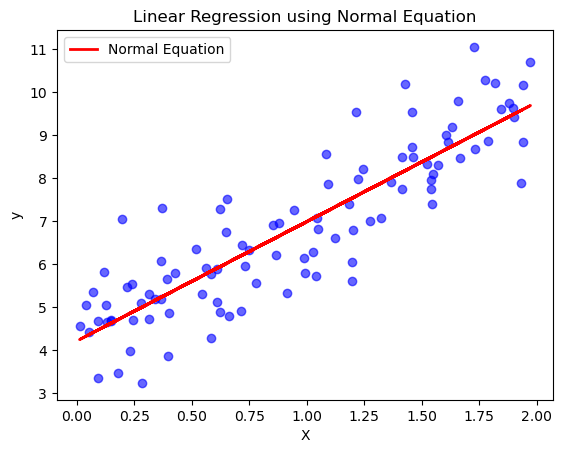

In [3]:
# Predictions
y_pred_normal = X_b.dot(theta_normal)

# Plot regression line
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(X, y_pred_normal, color='red', linewidth=2, label="Normal Equation")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Normal Equation")
plt.legend()
plt.show()

## Gradient Descent Implementation
Gradient Descent minimizes the cost function step by step by updating parameters in the opposite direction of the gradient.

The update rule is:
\[ \theta := \theta - \alpha \cdot \frac{1}{m} X^T(X\theta - y) \]
where $\alpha$ is the learning rate and $m$ is the number of samples.

In [4]:
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # add bias
    theta = np.random.randn(2, 1)
    losses = []
    
    for iteration in range(n_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        losses.append(loss)
    return theta, losses

# Run Gradient Descent
theta_gd, losses = gradient_descent(X, y, learning_rate=0.1, n_iterations=500)
theta_gd

array([[4.2150961 ],
       [2.77011343]])

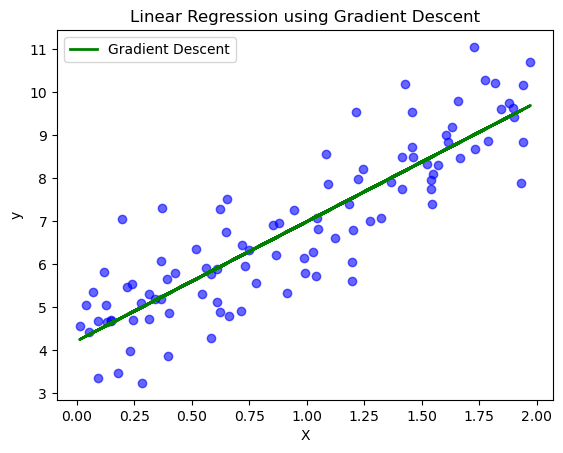

In [5]:
# Predictions from Gradient Descent
X_b = np.c_[np.ones((100, 1)), X]
y_pred_gd = X_b.dot(theta_gd)

# Plot regression line
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(X, y_pred_gd, color='green', linewidth=2, label="Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()

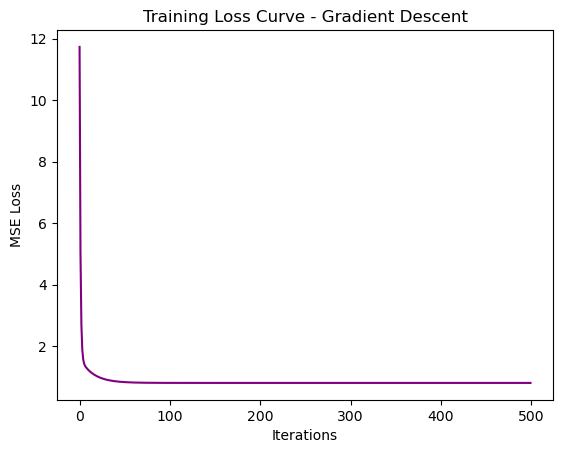

In [6]:
# Plot training loss curve
plt.plot(losses, color='purple')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - Gradient Descent")
plt.show()

## Evaluation Metrics
- **Mean Squared Error (MSE):** Measures average squared difference between predictions and actual values.
- **R² Score:** Proportion of variance in the dependent variable explained by the model.

In [7]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Evaluate Normal Equation
mse_normal = mean_squared_error(y, y_pred_normal)
r2_normal = r2_score(y, y_pred_normal)

# Evaluate Gradient Descent
mse_gd = mean_squared_error(y, y_pred_gd)
r2_gd = r2_score(y, y_pred_gd)

mse_normal, r2_normal, mse_gd, r2_gd

(0.8065845639670534, 0.7692735413614223, 0.806584563967054, 0.7692735413614221)

## Analysis & Insights
- **Normal Equation** computes an exact solution but involves matrix inversion, which is computationally expensive for very large datasets.
- **Gradient Descent** is iterative and works well for large-scale problems, but its performance depends on the choice of learning rate and number of iterations.
- In this experiment, both methods achieved very similar regression lines and high $R^2$ scores, confirming that Linear Regression can be solved efficiently using either approach.

### Summary Report:
- **Key Steps:** Data generation, Normal Equation solution, Gradient Descent optimization, visualization, evaluation.
- **Observations:** Both methods provide consistent results on small data; Gradient Descent shows how the loss decreases over iterations.
- **Insights:** The Normal Equation is simple and exact for small problems, while Gradient Descent is scalable and more suitable for high-dimensional datasets.

## Section from `Spectral_Clustering_Numpy.ipynb`

# Spectral Clustering from Scratch (NumPy)

## What is Clustering?

**Clustering** groups similar data points together. Classic algorithms like k-means assume clusters are roughly spherical. But many real-world datasets form complex shapes (e.g., two interleaving moons or concentric circles). **Spectral clustering** uses the idea of turning the dataset into a graph and then using properties of that graph (its Laplacian and eigenvectors) to find clusters that are **not** necessarily spherical.


## Types / variants of spectral clustering

There are a few common variants, differing mainly in how the graph and Laplacian are constructed:

**Graph construction**
- **Full similarity (Gaussian kernel):** Fully connected graph with weights `w(i,j)=exp(-||x_i-x_j||^2 / (2*sigma^2))`.
- **k-Nearest Neighbors (k-NN):** Connect each node to its k nearest neighbors (often symmetrized).
- **ε-neighborhood:** Connect nodes within distance ε.

**Laplacian variants**
- **Unnormalized Laplacian:** `L = D - A`, where `A` is adjacency and `D` is degree matrix.
- **Normalized Laplacian (symmetric):** `L_sym = D^{-1/2} L D^{-1/2}`.
- **Random-walk normalized Laplacian:** `L_rw = D^{-1} L`.


## Implementaton steps

1. A Gaussian similarity (full graph) adjacency matrix.
2. Symmetric normalized Laplacian `L_sym`.
3. Eigen decomposition of `L_sym` and selection of the smallest-k eigenvectors.
4. Row-normalization of that eigenvector matrix to form points for clustering.
5. K-means implemented from scratch (NumPy) to cluster in the eigen-space.
6. Visualizations that show the original data and clustering results.


In [1]:
# Standard imports and a reproducible plotting style
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## Generate a synthetic dataset (concentric circles)

We will use concentric circles (two circles) as an example because they are not separable by k-means in the original space but are separable with spectral clustering.

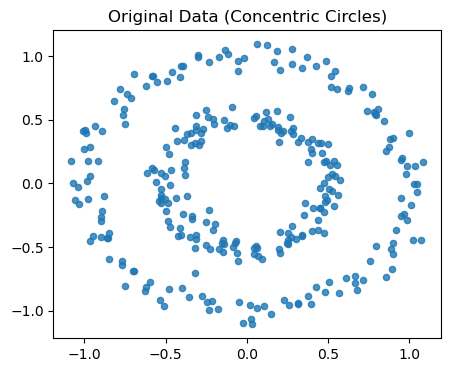

In [2]:
def make_concentric_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42):
    np.random.seed(random_state)
    n_out = n_samples // 2
    n_in = n_samples - n_out
    t_out = np.linspace(0, 2*np.pi, n_out, endpoint=False)
    t_in = np.linspace(0, 2*np.pi, n_in, endpoint=False)
    outer = np.column_stack([np.cos(t_out), np.sin(t_out)])
    inner = np.column_stack([np.cos(t_in)*factor, np.sin(t_in)*factor])
    X = np.vstack([outer, inner]) + noise * np.random.randn(n_samples, 2)
    return X

X = make_concentric_circles(300, noise=0.06, factor=0.5)
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], s=20, alpha=0.8)
plt.title('Original Data (Concentric Circles)')
plt.show()


## Build similarity (adjacency) matrix using Gaussian kernel

We'll compute a full `n x n` matrix where `A[i,j] = exp(-||x_i-x_j||^2 / (2*sigma^2))`. The parameter `sigma` controls how local the similarity is.


In [3]:
def gaussian_similarity_matrix(X, sigma=0.5):
    n = X.shape[0]
    # Compute squared pairwise distances efficiently
    sq_norms = np.sum(X**2, axis=1)
    sq_dists = sq_norms.reshape(-1,1) + sq_norms.reshape(1,-1) - 2*X.dot(X.T)
    A = np.exp(-sq_dists / (2 * sigma**2))
    # Optional: zero out self-similarity if desired (not strictly necessary)
    np.fill_diagonal(A, 0.0)
    return A

sigma = 0.5
A = gaussian_similarity_matrix(X, sigma=sigma)
print('Adjacency matrix shape:', A.shape)
print('Sample values (5x5):\n', np.round(A[:5,:5], 4))

Adjacency matrix shape: (300, 300)
Sample values (5x5):
 [[0.     0.9606 0.9835 0.9314 0.9079]
 [0.9606 0.     0.9858 0.9923 0.9787]
 [0.9835 0.9858 0.     0.9584 0.9657]
 [0.9314 0.9923 0.9584 0.     0.9657]
 [0.9079 0.9787 0.9657 0.9657 0.    ]]


## Degree matrix and symmetric normalized Laplacian

Degree matrix `D` is diagonal with `D[i,i] = sum_j A[i,j]`.
The symmetric normalized Laplacian: `L_sym = D^{-1/2} (D - A) D^{-1/2}`.

In [4]:
# Degree matrix
D = np.diag(A.sum(axis=1))

# Unnormalized Laplacian
L = D - A

# Symmetric normalized Laplacian
# Add a small epsilon to degree diagonal to avoid division by zero in degenerate cases
eps = 1e-8
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D) + eps))
L_sym = D_inv_sqrt.dot(L).dot(D_inv_sqrt)
print('L_sym shape:', L_sym.shape)

L_sym shape: (300, 300)


## Eigen decomposition of L_sym and selecting eigenvectors

We compute eigenvalues and eigenvectors of `L_sym`. For clustering into `k` groups we take the **first k eigenvectors** corresponding to the smallest eigenvalues (smallest after sorting).

Smallest eigenvalues: [0.       0.344491 0.34945  0.657266 0.663816 0.774917]


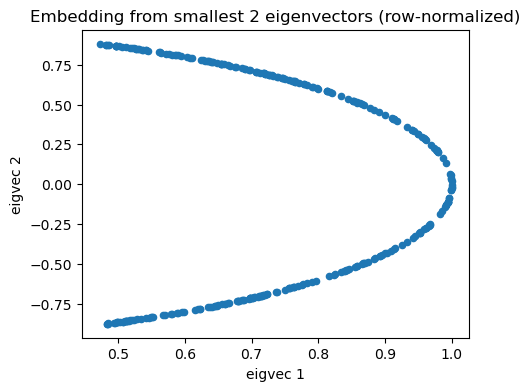

In [5]:
eigvals, eigvecs = np.linalg.eigh(L_sym)  # eigh for symmetric matrices
idx = np.argsort(eigvals)
eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

# Show a few smallest eigenvalues
print('Smallest eigenvalues:', np.round(eigvals[:6], 6))

k = 2
U = eigvecs[:, :k]

# Row-normalize U to get Z (as common in spectral clustering)
U_norm = U / (np.linalg.norm(U, axis=1, keepdims=True) + 1e-12)

# Visualize embedding (first two eigenvectors)
plt.figure(figsize=(5,4))
plt.scatter(U_norm[:,0], U_norm[:,1], s=20)
plt.title('Embedding from smallest 2 eigenvectors (row-normalized)')
plt.xlabel('eigvec 1')
plt.ylabel('eigvec 2')
plt.show()


## K-means (from scratch) on the eigenvector embedding

We implement a simple k-means using NumPy. The input is the row-normalized eigenvector matrix.

In [6]:
def kmeans_numpy(X, k, max_iters=200, tol=1e-6, random_state=42):
    np.random.seed(random_state)
    n, d = X.shape
    # Initialize centroids by sampling k unique points
    init_idx = np.random.choice(n, k, replace=False)
    centroids = X[init_idx].copy()

    for it in range(max_iters):
        # Assign labels
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels==i].mean(axis=0) if np.any(labels==i) else centroids[i] 
                                  for i in range(k)])
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tol:
            break
    return labels, centroids

labels, centroids = kmeans_numpy(U_norm, k=2)
print('Cluster counts:', np.bincount(labels))

Cluster counts: [154 146]


## Visualize final clustering results (original space)

We'll color points by their spectral cluster labels. Ideally, the concentric circles should be separated correctly (inner vs outer).

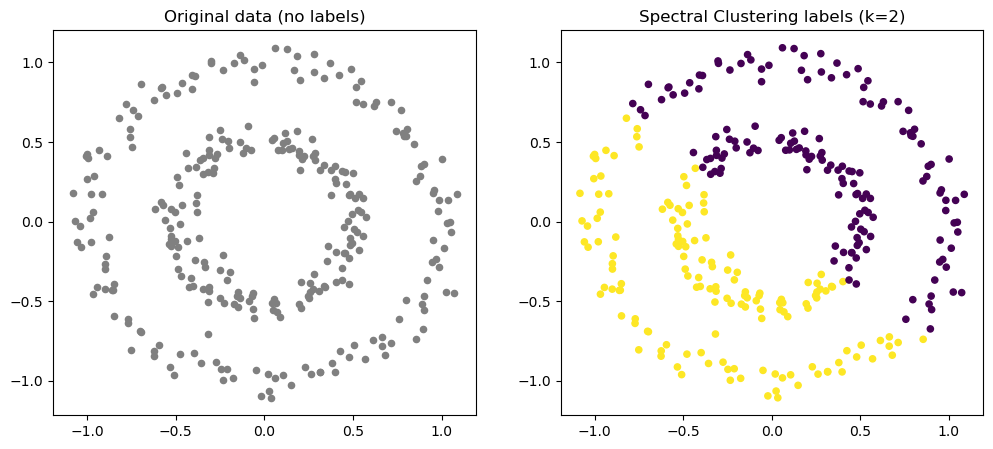

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c='grey', s=20)
plt.title('Original data (no labels)')

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=20)
plt.title('Spectral Clustering labels (k=2)')

plt.show()


## Comparison with Standard K-means

To highlight why spectral clustering is useful, we compare its results with **plain k-means directly on the original dataset**.

- K-means assumes clusters are convex and roughly spherical.
- On concentric circles or interleaving moons, k-means fails because the boundaries are not linear.
- Spectral clustering succeeds because it leverages the graph structure and eigenvectors of the Laplacian.


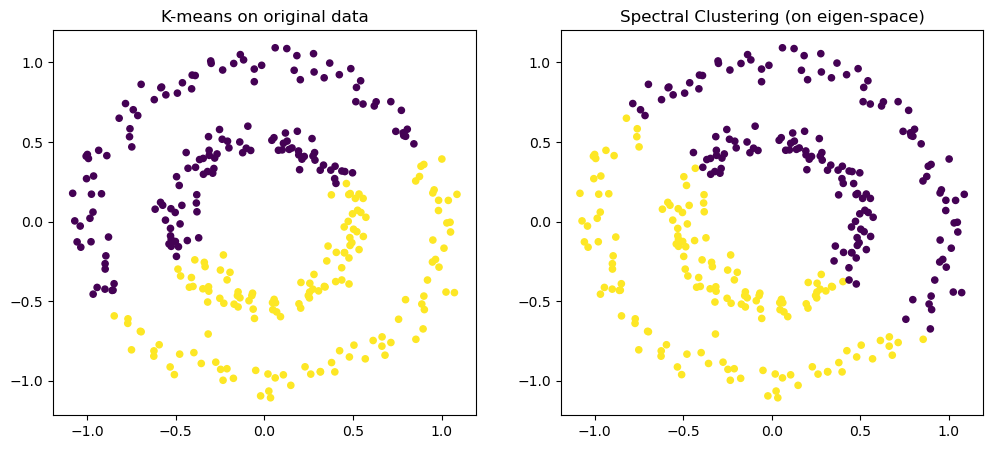

In [8]:
# Run k-means directly on the original data (not eigenvectors)
labels_kmeans_raw, _ = kmeans_numpy(X, k=2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_kmeans_raw, cmap='viridis', s=20)
plt.title('K-means on original data')

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=20)
plt.title('Spectral Clustering (on eigen-space)')

plt.show()

## Short Summary Report

**Key steps of implementation:**
1. Built adjacency matrix with Gaussian similarity.
2. Computed degree matrix and Laplacian (symmetric normalized).
3. Performed eigen decomposition and selected k smallest eigenvectors.
4. Normalized eigenvectors row-wise to form new feature space.
5. Applied k-means (NumPy) in this eigen-space to form clusters.
6. Visualized results and compared with standard k-means.

**Observations about performance:**
- K-means directly on original data fails to separate non-linear clusters.
- Spectral clustering correctly detects inner vs outer circle clusters.
- Computationally, spectral clustering is heavier due to eigen decomposition.

**Insights gained:**
- Spectral clustering is powerful for non-linear data because it relies on graph connectivity rather than geometric distance in original space.
- Parameter selection (sigma, k) strongly impacts results.
- For large datasets, efficiency requires sparse graph construction.